In [103]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import integrate


In [104]:
# root_file_dir= '~/Desktop/Root_files/'
root_file_dir= '~/Desktop/Data/'
BB_area= [50,100,150,200,250,300,350,400,450,500,550,600,650,700]


In [105]:
file50= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

# file50.keys(filter_name='**')


In [106]:
file50_1= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_1= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_1= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_1= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_1= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_1= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_1= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_1= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_1= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_1= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_1= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_1= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_1= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_1= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_1= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [107]:
file50_2= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_2= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_2= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_2= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_2= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_2= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_2= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_2= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_2= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_2= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_2= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_2= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_2= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_2= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_2= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [108]:
file50_3= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_3= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_3= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_3= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_3= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_3= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_3= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_3= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_3= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_3= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_3= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_3= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_3= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_3= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_3= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [109]:
file50_4= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_4= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_4= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_4= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_4= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_4= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_4= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_4= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_4= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_4= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_4= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_4= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_4= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_4= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_4= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [110]:
file50_5= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_5= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_5= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_5= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_5= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_5= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_5= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_5= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_5= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_5= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_5= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_5= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_5= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_5= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_5= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [111]:
file50_6= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_6= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_6= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_6= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_6= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_6= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_6= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_6= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_6= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_6= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_6= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_6= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_6= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_6= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_6= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [112]:
file50_7= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_7= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_7= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_7= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_7= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_7= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_7= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_7= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_7= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_7= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_7= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_7= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_7= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_7= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_7= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [113]:
file50_8= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_8= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_8= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_8= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_8= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_8= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_8= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_8= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_8= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_8= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_8= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_8= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_8= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_8= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_8= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [114]:
file50_9= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_9= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_9= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_9= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_9= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_9= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_9= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_9= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_9= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_9= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_9= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_9= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_9= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_9= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_9= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [115]:
file50_10= uproot.open(root_file_dir + 'output_BB_050_nevents_10_detsim_5.root:Events')
file100_10= uproot.open(root_file_dir + 'output_BB_100_nevents_10_detsim_5.root:Events')
file150_10= uproot.open(root_file_dir + 'output_BB_150_nevents_10_detsim_5.root:Events')
file200_10= uproot.open(root_file_dir + 'output_BB_200_nevents_10_detsim_5.root:Events')
file250_10= uproot.open(root_file_dir + 'output_BB_250_nevents_10_detsim_5.root:Events')
file300_10= uproot.open(root_file_dir + 'output_BB_300_nevents_10_detsim_5.root:Events')
file350_10= uproot.open(root_file_dir + 'output_BB_350_nevents_10_detsim_5.root:Events')
file400_10= uproot.open(root_file_dir + 'output_BB_400_nevents_10_detsim_5.root:Events')
file450_10= uproot.open(root_file_dir + 'output_BB_450_nevents_10_detsim_5.root:Events')
file500_10= uproot.open(root_file_dir + 'output_BB_500_nevents_10_detsim_5.root:Events')
file550_10= uproot.open(root_file_dir + 'output_BB_550_nevents_10_detsim_5.root:Events')
file600_10= uproot.open(root_file_dir + 'output_BB_600_nevents_10_detsim_5.root:Events')
file650_10= uproot.open(root_file_dir + 'output_BB_650_nevents_10_detsim_5.root:Events')
file700_10= uproot.open(root_file_dir + 'output_BB_700_nevents_10_detsim_5.root:Events')
files_list_10= [file50, file100, file150, file200, file250, file300, file350, file400,
              file450, file500, file550, file600, file650, file700]

In [116]:
files_full_list= [files_list_1, files_list_2, files_list_3, files_list_4, files_list_5, files_list_6,
                   files_list_7, files_list_8, files_list_9, files_list_10]

In [117]:

def find_hist(array):
    count,bin, _= plt.hist(array)
    return count, bin[:-1]+bin[0]/2

def find_integral_1f(name):
    integral_total=[]
    for i in range(len(files_full_list)):
        arrays= [ak.flatten(files_full_list[i][k][str(name)].array()).to_numpy() for k in range(len(files_list))]
        counts= []
        bins= []
        for j in range(len(arrays)):
            c,b= find_hist(arrays[j])
            counts.append(c)
            bins.append(b)
        plt.clf()

        integral= [integrate.simpson(counts[l], bins[l]) for l in range(len(arrays))]
        integral_total.append(integral)   
    return integral_total

def find_integral_2f(name):
    integral_total=[]
    for i in range(len(files_full_list)):
        arrays= [ak.flatten(ak.flatten(files_full_list[i][k][str(name)].array())).to_numpy() for k in range(len(files_list))]
        counts= []
        bins= []
        for j in range(len(arrays)):
            c,b= find_hist(arrays[j])
            counts.append(c)
            bins.append(b)
        plt.clf()

        integral= [integrate.simpson(counts[l], bins[l]) for l in range(len(arrays))]
        integral_total.append(integral)   
    return integral_total

def find_integral_3f(name):
    integral_total=[]
    for i in range(len(files_full_list)):
        arrays= [ak.flatten(ak.flatten(ak.flatten(files_full_list[i][k][str(name)].array()))).to_numpy() for k in range(len(files_list))]
        counts= []
        bins= []
        for j in range(len(arrays)):
            c,b= find_hist(arrays[j])
            counts.append(c)
            bins.append(b)
        plt.clf()

        integral= [integrate.simpson(counts[l], bins[l]) for l in range(len(arrays))]
        integral_total.append(integral)   
    return integral_total


Text(0.5, 1.05, 'Histogram of Energy deposited in CRT')

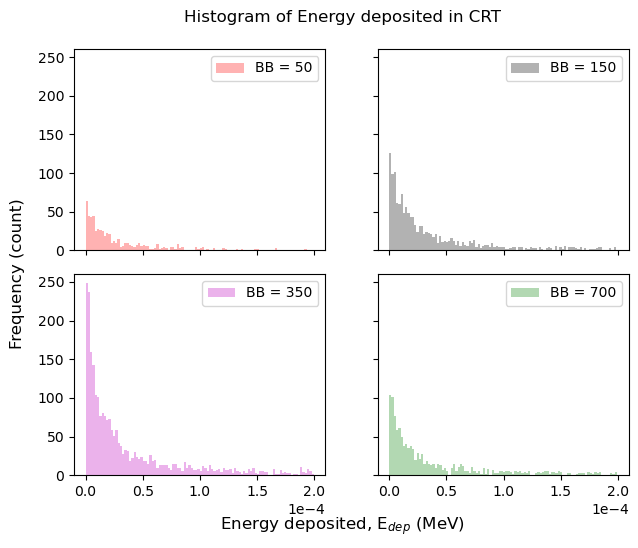

In [118]:
rr_name= 'sim::AuxDetIDEs_crtsim__DetSim./sim::AuxDetIDEs_crtsim__DetSim.obj/sim::AuxDetIDEs_crtsim__DetSim.obj.energyDeposited'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()

# a150= a150[a150>0.0005]
# a50= a50[a50>0.0005]
# a700= a700[a700>0.005]
# a350= a350[a350>0.005]

axs[0][1].hist(a150[a150<0.0002], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<0.0002], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<0.0002], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<0.0002], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.supxlabel(r'Energy deposited, E$_{dep}$ (MeV)', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of Energy deposited in CRT', y=1.05)



Text(0.5, 1.05, 'Histogram of number of electrons inside TPC')

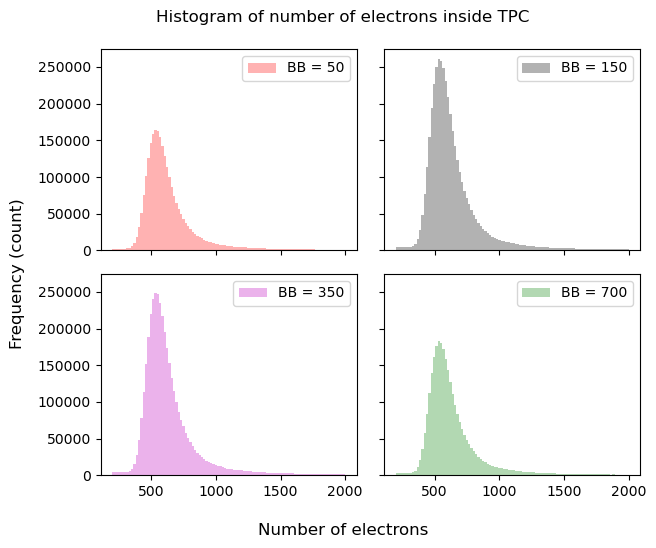

In [119]:
rr_name= 'sim::SimEnergyDeposits_ionandscintout__G4./sim::SimEnergyDeposits_ionandscintout__G4.obj/sim::SimEnergyDeposits_ionandscintout__G4.obj.numElectrons'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()

a150= a150[a150>200]
a50= a50[a50>200]
a700= a700[a700>200]
a350= a350[a350>200]

axs[0][1].hist(a150[a150<2000], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<2000], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<2000], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<2000], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()

fig.supxlabel(r'Number of electrons', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of number of electrons inside TPC', y=1.05)

Text(0.5, 1.05, 'Histogram of number of photons inside TPC')

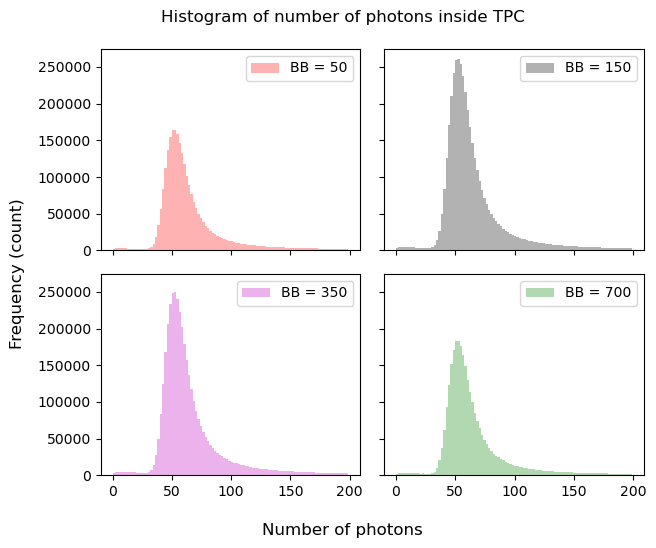

In [124]:
rr_name= 'sim::SimEnergyDeposits_ionandscintout__G4./sim::SimEnergyDeposits_ionandscintout__G4.obj/sim::SimEnergyDeposits_ionandscintout__G4.obj.numPhotons'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()

# a150= a150[a150>200]
# a50= a50[a50>200]
# a700= a700[a700>200]
# a350= a350[a350>200]

axs[0][1].hist(a150[a150<200], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<200], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<200], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<200], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
fig.supxlabel(r'Number of photons', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of number of photons inside TPC', y=1.05)

Text(0.5, 1.05, 'Histogram of ADC value')

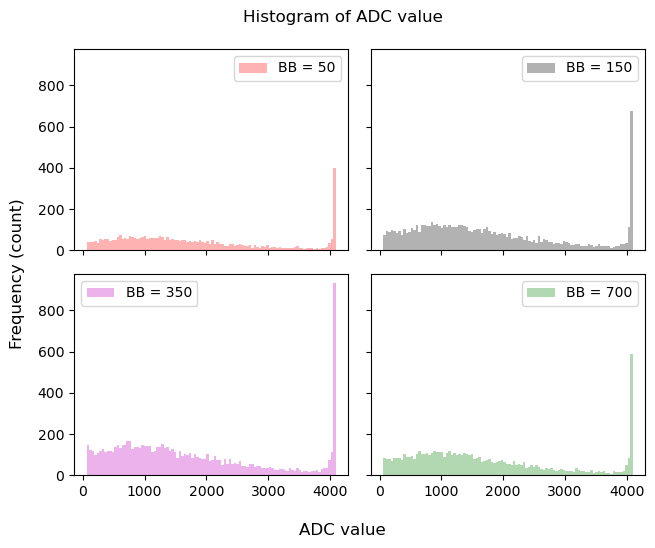

In [125]:
rr_name= 'sbnd::crt::CRTDatas_crt__DetSim./sbnd::crt::CRTDatas_crt__DetSim.obj/sbnd::crt::CRTDatas_crt__DetSim.obj.fADC'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()


axs[0][1].hist(a150[:], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[:], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[:], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[:], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
fig.supxlabel(r'ADC value', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of ADC value', y=1.05)

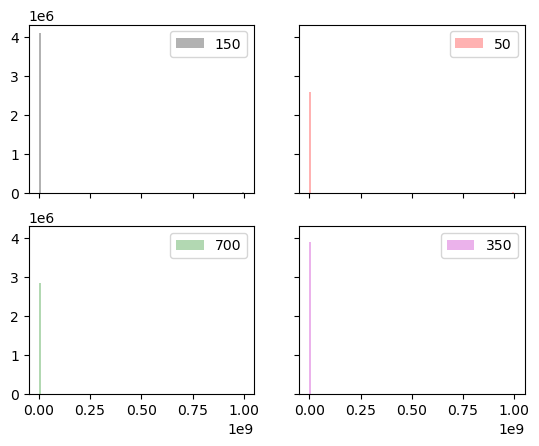

In [41]:
rr_name=  'sim::SimEnergyDeposits_ionandscintout__G4./sim::SimEnergyDeposits_ionandscintout__G4.obj/sim::SimEnergyDeposits_ionandscintout__G4.obj.pdgCode'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()
axs[0][0].hist(a150, bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][1].hist(a50, bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][0].hist(a700, bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][1].hist(a350, bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()

Text(0.5, 1.05, 'Histogram of mass of particles inside TPC')

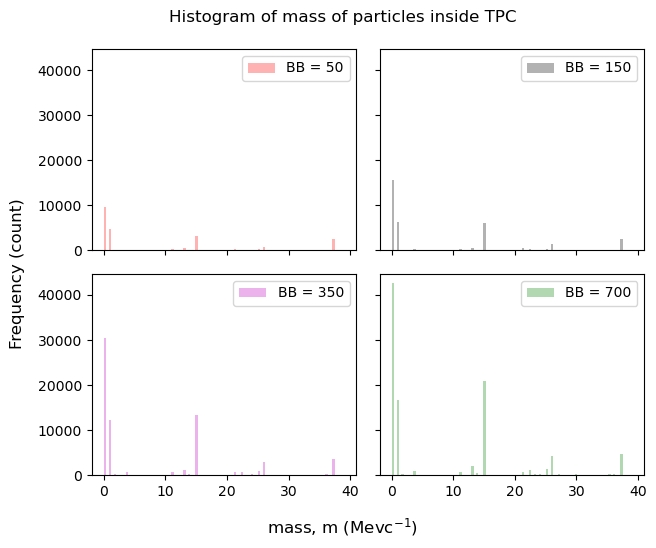

In [132]:
rr_name=  'simb::MCParticles_largeant__G4./simb::MCParticles_largeant__G4.obj/simb::MCParticles_largeant__G4.obj.fmass'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(file50[str(rr_name)].array()).to_numpy()
a150= ak.flatten(file150[str(rr_name)].array()).to_numpy()
a350= ak.flatten(file350[str(rr_name)].array()).to_numpy()
a700= ak.flatten(file700[str(rr_name)].array()).to_numpy()
axs[0][1].hist(a150[a150<40], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<40], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<40], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<40], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
fig.supxlabel(r'mass, m (Mevc$^{-1}$)', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of mass of particles inside TPC', y=1.05)

Text(0.5, 1.05, 'Histogram of stopping charge of tracks in TPC')

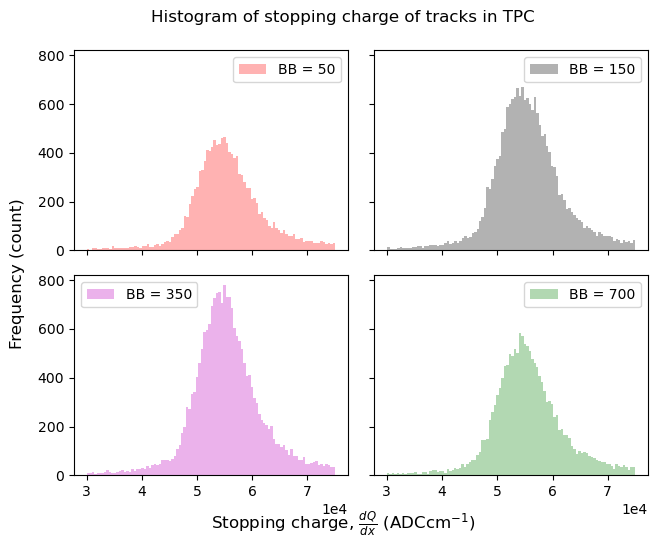

In [133]:
rr_name=  'sim::MCTracks_mcreco__G4./sim::MCTracks_mcreco__G4.obj/sim::MCTracks_mcreco__G4.obj.fdQdx'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(ak.flatten(ak.flatten(file50[str(rr_name)].array()))).to_numpy()
a150= ak.flatten(ak.flatten(ak.flatten(file150[str(rr_name)].array()))).to_numpy()
a350= ak.flatten(ak.flatten(ak.flatten(file350[str(rr_name)].array()))).to_numpy()
a700= ak.flatten(ak.flatten(ak.flatten(file700[str(rr_name)].array()))).to_numpy()

a150= a150[a150>30000]
a50= a50[a50>30000]
a700= a700[a700>30000]
a350= a350[a350>30000]

axs[0][1].hist(a150[a150<75000], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<75000], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<75000], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<75000], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.supxlabel(r'Stopping charge, $\frac{dQ}{dx}$ (ADCcm$^{-1}$)', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of stopping charge of tracks in TPC', y=1.05)

Text(0.5, 1.05, 'Histogram of stopping energy of tracks in TPC')

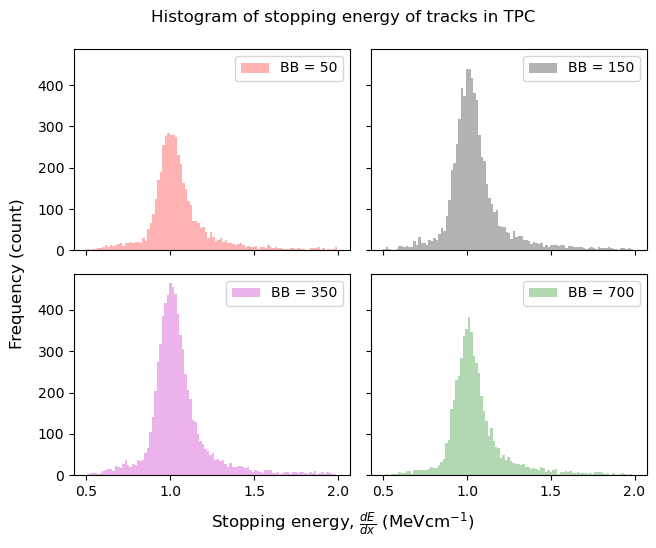

In [134]:
rr_name=  'sim::MCTracks_mcreco__G4./sim::MCTracks_mcreco__G4.obj/sim::MCTracks_mcreco__G4.obj.fdEdx'
fig,axs= plt.subplots(2,2, sharey=True, sharex= True)
a50= ak.flatten(ak.flatten(file50[str(rr_name)].array())).to_numpy()
a150= ak.flatten(ak.flatten(file150[str(rr_name)].array())).to_numpy()
a350= ak.flatten(ak.flatten(file350[str(rr_name)].array())).to_numpy()
a700= ak.flatten(ak.flatten(file700[str(rr_name)].array())).to_numpy()
a150= a150[a150>0.5]
a50= a50[a50>0.5]
a700= a700[a700>0.5]
a350= a350[a350>0.5]
axs[0][1].hist(a150[a150<2], bins=100, label='BB = 150', alpha= 0.3, color='k')
axs[0][0].hist(a50[a50<2], bins=100, label='BB = 50', alpha= 0.3, color='r')
axs[1][1].hist(a700[a700<2], bins=100, label='BB = 700', alpha= 0.3, color='g')
axs[1][0].hist(a350[a350<2], bins=100, label='BB = 350', alpha= 0.3, color='m')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
fig.tight_layout()
# axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.supxlabel(r'Stopping energy, $\frac{dE}{dx}$ (MeVcm$^{-1}$)', y=-0.05)
fig.supylabel('Frequency (count)', x=-0.02)
fig.suptitle('Histogram of stopping energy of tracks in TPC', y=1.05)

In [135]:
Edep_name= 'sim::AuxDetIDEs_crtsim__DetSim./sim::AuxDetIDEs_crtsim__DetSim.obj/sim::AuxDetIDEs_crtsim__DetSim.obj.energyDeposited'
nele_name= 'sim::SimEnergyDeposits_ionandscintout__G4./sim::SimEnergyDeposits_ionandscintout__G4.obj/sim::SimEnergyDeposits_ionandscintout__G4.obj.numElectrons'
npho_name= 'sim::SimEnergyDeposits_ionandscintout__G4./sim::SimEnergyDeposits_ionandscintout__G4.obj/sim::SimEnergyDeposits_ionandscintout__G4.obj.numPhotons'
ADC_name= 'sbnd::crt::CRTDatas_crt__DetSim./sbnd::crt::CRTDatas_crt__DetSim.obj/sbnd::crt::CRTDatas_crt__DetSim.obj.fADC'
daughter_name= 'simb::MCParticles_largeant__G4./simb::MCParticles_largeant__G4.obj/simb::MCParticles_largeant__G4.obj.fdaughters'
mass_name=  'simb::MCParticles_largeant__G4./simb::MCParticles_largeant__G4.obj/simb::MCParticles_largeant__G4.obj.fmass'
dqdx_name=  'sim::MCTracks_mcreco__G4./sim::MCTracks_mcreco__G4.obj/sim::MCTracks_mcreco__G4.obj.fdQdx'
dedx_name=  'sim::MCTracks_mcreco__G4./sim::MCTracks_mcreco__G4.obj/sim::MCTracks_mcreco__G4.obj.fdEdx'

In [136]:
integral_Edep=find_integral_1f(str(Edep_name))
integral_nele=find_integral_1f(str(nele_name))
integral_npho=find_integral_1f(str(npho_name))
integral_ADC=find_integral_1f(str(ADC_name))
integral_daughter=find_integral_2f(str(daughter_name))
integral_mass=find_integral_1f(str(mass_name))
integral_dqdx=find_integral_3f(str(dqdx_name))
integral_dedx=find_integral_2f(str(dedx_name))

<Figure size 640x480 with 0 Axes>

In [137]:
e_integral_Edep= np.std(np.array(integral_Edep)/np.sqrt(10), axis=0)
e_integral_nele= np.std(np.array(integral_nele)/np.sqrt(10), axis=0)
e_integral_npho= np.std(np.array(integral_npho)/np.sqrt(10), axis=0)
e_integral_ADC= np.std(np.array(integral_ADC)/np.sqrt(10), axis=0)
e_integral_daughter= np.std(np.array(integral_daughter)/np.sqrt(10), axis=0)
e_integral_mass= np.std(np.array(integral_mass)/np.sqrt(10), axis=0)
e_integral_dqdx= np.std(np.array(integral_dqdx)/np.sqrt(10), axis=0)
e_integral_dedx= np.std(np.array(integral_dedx)/np.sqrt(10), axis=0)

integral_Edep= np.average(np.array(integral_Edep), axis=0)
integral_nele= np.average(np.array(integral_nele), axis=0)
integral_npho= np.average(np.array(integral_npho), axis=0)
integral_ADC= np.average(np.array(integral_ADC), axis=0)
integral_daughter= np.average(np.array(integral_daughter), axis=0)
integral_mass= np.average(np.array(integral_mass), axis=0)
integral_dqdx= np.average(np.array(integral_dqdx), axis=0)
integral_dedx= np.average(np.array(integral_dedx), axis=0)


Text(0.5, 1.02, 'Plot of histogram integral vs boundary box size')

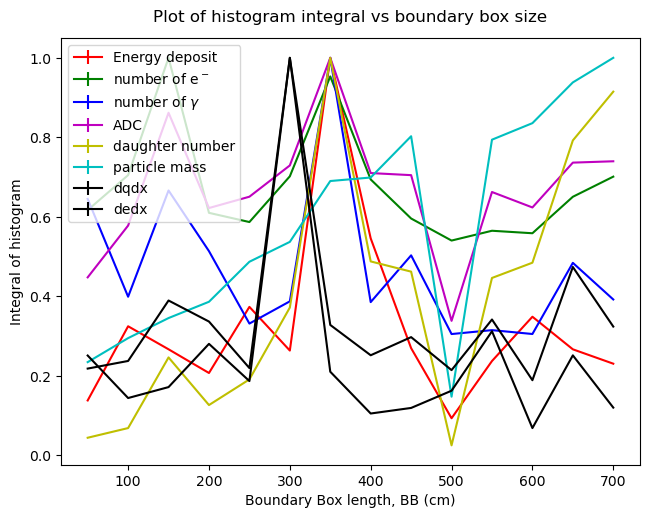

In [145]:
plt.errorbar(BB_area, integral_Edep/max(integral_Edep), yerr=e_integral_Edep,  c= 'r', label='Energy deposit')
plt.errorbar(BB_area, integral_nele/max(integral_nele), yerr=e_integral_nele, c= 'g', label=r'number of e$^-$')
plt.errorbar(BB_area, integral_npho/max(integral_npho), yerr=e_integral_npho, c= 'b', label=r'number of $\gamma$')
plt.errorbar(BB_area, integral_ADC/max(integral_ADC), yerr=e_integral_ADC, c= 'm', label='ADC')
plt.errorbar(BB_area, integral_daughter/max(integral_daughter), yerr=e_integral_daughter, c= 'y', label='daughter number')
plt.errorbar(BB_area, integral_mass/max(integral_mass), yerr=e_integral_mass,c= 'c', label='particle mass')
plt.errorbar(BB_area, integral_dqdx/max(integral_dqdx), yerr=e_integral_dqdx,c= 'k', label='dqdx')
plt.errorbar(BB_area, integral_dedx/max(integral_dedx), yerr=e_integral_dedx,c= 'k', label='dedx')
plt.legend( )
plt.tight_layout()
# axs[1][0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel(r'Boundary Box length, BB (cm)', y=-0.05)
plt.ylabel('Integral of histogram', x=-0.02)
plt.title('Plot of histogram integral vs boundary box size', y=1.02)

look at ratio of muons thart leave tpc and which dont
look at angle incidence